## MO444 Project 3 - Reinforcement Learning

* Rodrigo Araújo Marinho Franco - RA: 233569
* Felipe Marinho Tavares - RA: 265680

### Contributions:
* Rodrigo
 * ...
* Felipe
 * ...

# PART I - Evolutionary Model

# PART II - Reinforcement Learning

In [1]:
from collections import deque
import matplotlib.pyplot as plt

import environment

640
640
Episode:  1 Average Score: -229.00 Winrate: 0.00%
Episode:  1000 Average Score: -333.83 Winrate: 0.00%
Episode:  2000 Average Score: -190.67 Winrate: 0.00%
Episode:  3000 Average Score: -32.51 Winrate: 0.00%
Episode:  4000 Average Score: 12.05 Winrate: 0.00%
Episode:  5000 Average Score: -39.05 Winrate: 0.00%
Episode:  6000 Average Score: -117.69 Winrate: 0.00%
Episode:  7000 Average Score: -100.54 Winrate: 0.00%
Episode:  8000 Average Score: -88.42 Winrate: 0.00%
Episode:  9000 Average Score: -122.51 Winrate: 0.00%
Episode:  10000 Average Score: -89.16 Winrate: 0.00%
Episode:  11000 Average Score: -60.91 Winrate: 0.00%
Episode:  12000 Average Score: -87.84 Winrate: 0.00%
Episode:  13000 Average Score: -10.63 Winrate: 0.00%
Episode:  14000 Average Score: 13.34 Winrate: 0.00%
Episode:  15000 Average Score: -13.24 Winrate: 0.00%
Episode:  16000 Average Score: 6.99 Winrate: 0.00%
Episode:  17000 Average Score: 61.61 Winrate: 0.00%
Episode:  18000 Average Score: 64.06 Winrate: 0.00

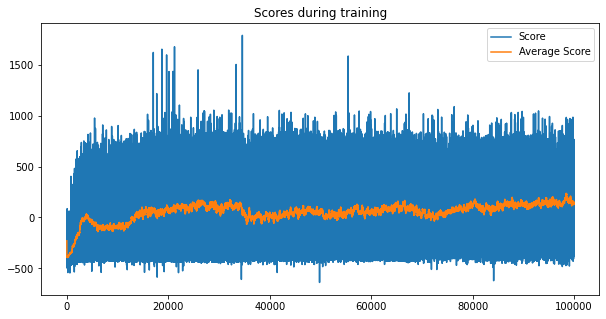

In [2]:
wins = []
wins_window = deque(maxlen=200)
scores = []
scores_window = deque(maxlen=200)
average_scores = []

env = environment.Environment(learning_rate=1e-5)

eps_start = 1.0
eps_end = 0.05
eps_decay=0.999
eps = eps_start

n_episodes = 100000
print_every = n_episodes/100
for i_episode in range(1, n_episodes + 1):
    env.reset()

    while not env.done():
        env.step(eps)

    eps = max(eps_end, eps_decay*eps)

    scores.append(env.game.state.getScore())
    scores_window.append(env.game.state.getScore())

    wins.append(env.game.state.isWin())
    wins_window.append(env.game.state.isWin())

    average_score = sum(scores_window)/float(len(scores_window))
    winrate = sum(wins_window)/float(len(wins_window)) * 100.0
    average_scores.append(average_score)

    if i_episode == 1 or i_episode % print_every == 0:
        print("Episode: ", i_episode, end=" ")
        print('Average Score: {:.2f}'.format(average_score), end=" ")
        print('Winrate: {:.2f}%'.format(winrate))

plt.figure(figsize=(10, 5))
plt.title("Scores during training")
line1, = plt.plot(scores)
line2, = plt.plot(average_scores)
plt.legend([line1, line2], ["Score", "Average Score"])
plt.show()